In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

In [4]:
path_ds = "/home/jupyter/.fastai/data/plant_pathology/images"; path_ds

'/home/jupyter/.fastai/data/plant_pathology/images'

In [5]:
path_csv = '/home/jupyter/.fastai/data/plant_pathology/images/train.csv'

In [6]:
df = pd.read_csv(path_csv)
df.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [7]:
tfms = get_transforms(do_flip=False)

In [8]:
data = ImageDataBunch.from_csv(path_ds, csv_labels = 'train.csv', label_col = ['healthy', 'multiple_diseases', 'rust', 'scab'], suffix = '.jpg', ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

['healthy', 'multiple_diseases', 'rust', 'scab']

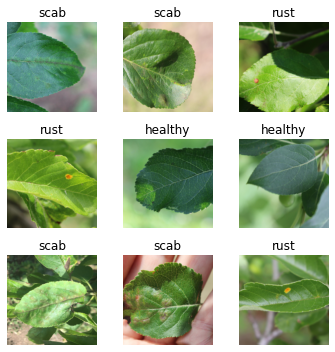

In [9]:
data.show_batch(rows=3, figsize=(5,5))
data.classes

In [10]:
print(data.classes)
len(data.classes),data.c

['healthy', 'multiple_diseases', 'rust', 'scab']


(4, 4)

## Training: resnet50

In [11]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [ ]:
learn.fit_one_cycle(8)

In [ ]:
learn.save('plant_stage-1_resnet50')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


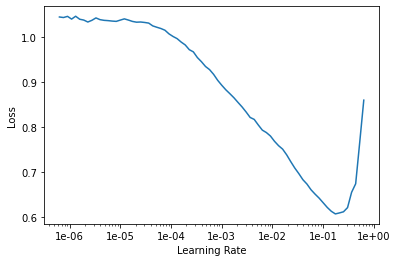

In [45]:
learn.lr_find()
learn.recorder.plot()

In [50]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-4,2*1e-1))

epoch,train_loss,valid_loss,error_rate,time
0,0.564903,2461.599365,1.000000,00:49
1,0.556186,4.413111,0.831044,00:49
2,0.429243,0.285470,0.828984,00:48


In [17]:
learn.fit_one_cycle(3, max_lr=slice(1e-4,2*1e-1))

epoch,train_loss,valid_loss,error_rate,time
0,0.347998,0.692561,0.752747,00:50
1,0.389810,0.563460,0.778846,00:51
2,0.396127,0.449787,0.774038,00:51


25 misclassified samples over 364 samples in the validation set.


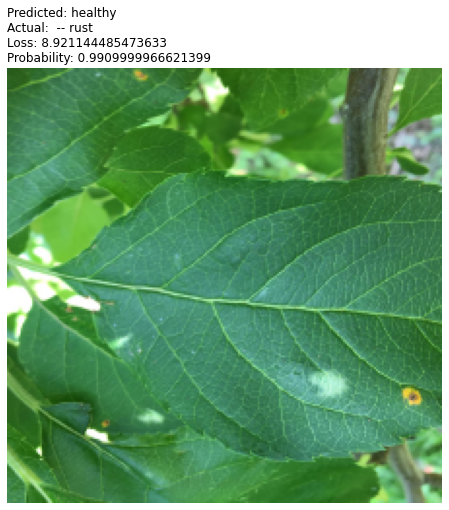

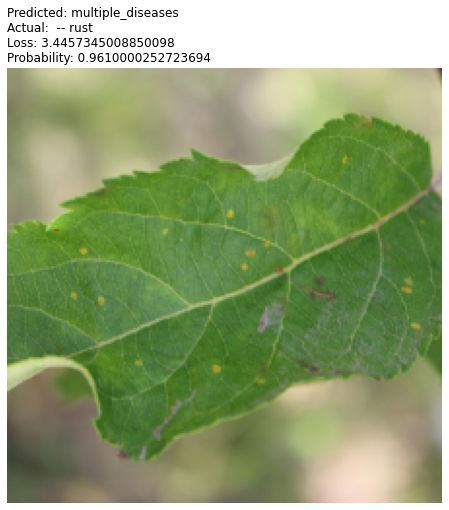

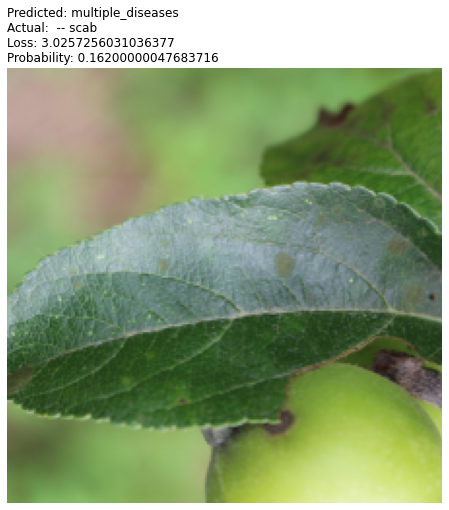

In [16]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_multi_top_losses()

In [56]:
learn.save('plant_stage-2-50');

In [18]:
learn.load('plant_stage-2-50')

Learner(data=ImageDataBunch;

Train: LabelList (1457 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: MultiCategoryList
scab,multiple_diseases,healthy,rust,healthy
Path: /home/jupyter/.fastai/data/plant_pathology/images;

Valid: LabelList (364 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: MultiCategoryList
healthy,rust,scab,rust,scab
Path: /home/jupyter/.fastai/data/plant_pathology/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=Fal

In [19]:
interp = ClassificationInterpretation.from_learner(learn)

20 misclassified samples over 364 samples in the validation set.


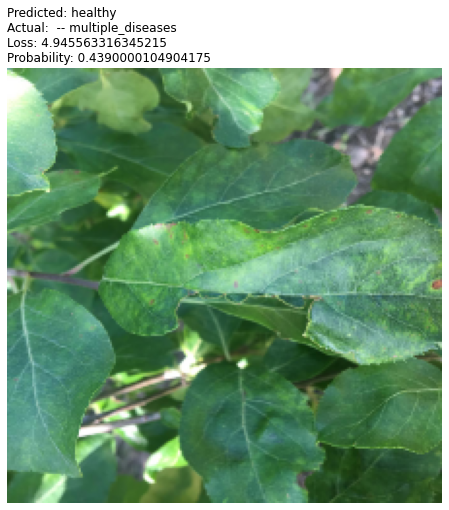

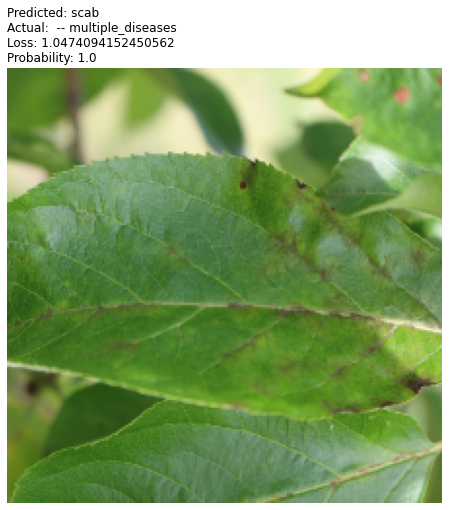

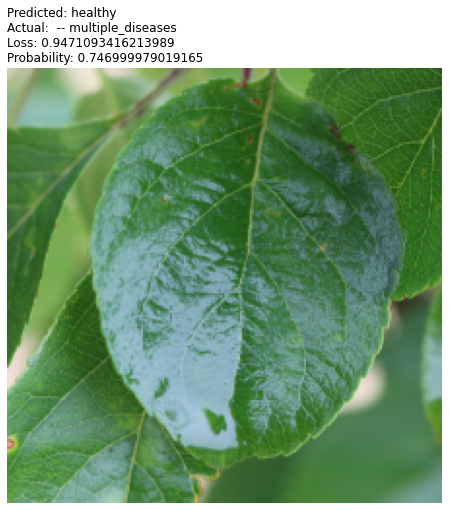

In [20]:
interp.plot_multi_top_losses()

In [27]:
print('image_id,healthy,multiple_diseases,rust,scab')
for i in range(1821):
    img = open_image(path_ds + '/Test_{}.jpg'.format(i))
    pred_class,pred_idx,outputs = learn.predict(img)
    print('Test_{}'.format(i) + ',{},{},{},{}'.format(outputs[0], outputs[1], outputs[2], outputs[3]))

Test_0,0.0010819368762895465,0.013814307749271393,0.9997425675392151,0.00011396197805879638
Test_1,1.3878127901989501e-05,0.019830532371997833,0.9999405145645142,1.2355118087725714e-05
Test_2,6.998056051088497e-06,0.023920048028230667,0.00013214942009653896,0.9985916018486023
Test_3,0.9999929666519165,0.0008064823923632503,0.00012115055869799107,0.00012213218724355102
Test_4,2.0853583304614176e-09,3.905266567016952e-05,1.0,2.7103858712962392e-08
Test_5,0.9997161030769348,0.004391212947666645,0.00042834129999391735,0.005262197460979223
Test_6,0.9999452829360962,0.003221531631425023,0.0003239512152504176,0.0015348800225183368
Test_7,1.7255861166631803e-05,0.02031541056931019,0.00013086697435937822,0.9982855916023254
Test_8,0.09989888966083527,0.3737025856971741,0.31587308645248413,0.036397699266672134
Test_9,3.712122997967526e-05,0.0058099254965782166,0.9999736547470093,1.2661877917707898e-05
Test_10,0.00039733166340738535,0.04536560922861099,0.9992823004722595,0.00013586314162239432
Tes